In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy
# Import the requests library.
import requests


In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

586

In [6]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

from config import weather_api_key
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# Create counters.
record_count = 1
set_count = 1


# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    

    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        print(city_url)
        print(city_lat)
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | vaini
Processing Record 2 of Set 1 | the valley
Processing Record 3 of Set 1 | lensk
Processing Record 4 of Set 1 | faanui
Processing Record 5 of Set 1 | port augusta
Processing Record 6 of Set 1 | hithadhoo
Processing Record 7 of Set 1 | ternate
Processing Record 8 of Set 1 | mar del plata
Processing Record 9 of Set 1 | boa vista
Processing Record 10 of Set 1 | moissala
Processing Record 11 of Set 1 | hobart
Processing Record 12 of Set 1 | bredasdorp
Processing Record 13 of Set 1 | puerto ayora
Processing Record 14 of Set 1 | rikitea
Processing Record 15 of Set 1 | hearst
Processing Record 16 of Set 1 | cabo san lucas
Processing Record 17 of Set 1 | lobito
Processing Record 18 of Set 1 | longyan
Processing Record 19 of Set 1 | altamont
Processing Record 20 of Set 1 | saskylakh
Processing Record 21 of Set 1 | nekrasovka
Processing Record 22 of Set 1 | san vicente
City not found. Skipping...
http:

Processing Record 40 of Set 3 | padang
Processing Record 41 of Set 3 | lipin bor
Processing Record 42 of Set 3 | pitimbu
Processing Record 43 of Set 3 | louisbourg
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=979ad474b8806d02941077b098e508b9&q=louisbourg
-7.4706
Processing Record 44 of Set 3 | ewa beach
Processing Record 45 of Set 3 | bubaque
Processing Record 46 of Set 3 | rawson
Processing Record 47 of Set 3 | dikson
Processing Record 48 of Set 3 | kaitangata
Processing Record 49 of Set 3 | pundaguitan
Processing Record 50 of Set 3 | viedma
Processing Record 1 of Set 4 | tomatlan
Processing Record 2 of Set 4 | mitsamiouli
Processing Record 3 of Set 4 | zaraza
Processing Record 4 of Set 4 | mahebourg
Processing Record 5 of Set 4 | great falls
Processing Record 6 of Set 4 | ancud
Processing Record 7 of Set 4 | umba
Processing Record 8 of Set 4 | berlevag
Processing Record 9 of Set 4 | samarai
Processing Record 10 of Set 4 | dunedin
Pro

Processing Record 39 of Set 6 | rawannawi
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=979ad474b8806d02941077b098e508b9&q=rawannawi
4.9333
Processing Record 40 of Set 6 | venado tuerto
Processing Record 41 of Set 6 | lemesos
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=979ad474b8806d02941077b098e508b9&q=lemesos
-33.7456
Processing Record 42 of Set 6 | kruisfontein
Processing Record 43 of Set 6 | broome
Processing Record 44 of Set 6 | tiznit
Processing Record 45 of Set 6 | catemaco
Processing Record 46 of Set 6 | agadez
Processing Record 47 of Set 6 | chapais
Processing Record 48 of Set 6 | nemuro
Processing Record 49 of Set 6 | severo-kurilsk
Processing Record 50 of Set 6 | benito juarez
Processing Record 1 of Set 7 | roald
Processing Record 2 of Set 7 | banff
Processing Record 3 of Set 7 | yerbogachen
Processing Record 4 of Set 7 | kaupanger
Processing Record 5 of Set 7 | vyshneve
Pro

Processing Record 35 of Set 9 | banda aceh
Processing Record 36 of Set 9 | alexandria
Processing Record 37 of Set 9 | kamaishi
Processing Record 38 of Set 9 | salihorsk
Processing Record 39 of Set 9 | nguiu
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=979ad474b8806d02941077b098e508b9&q=nguiu
52.7876
Processing Record 40 of Set 9 | gazni
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=979ad474b8806d02941077b098e508b9&q=gazni
52.7876
Processing Record 41 of Set 9 | nacala
Processing Record 42 of Set 9 | boralday
Processing Record 43 of Set 9 | muana
Processing Record 44 of Set 9 | havoysund
Processing Record 45 of Set 9 | pangnirtung
Processing Record 46 of Set 9 | thinadhoo
Processing Record 47 of Set 9 | taree
Processing Record 48 of Set 9 | stornoway
Processing Record 49 of Set 9 | yokadouma
Processing Record 50 of Set 9 | bilma
Processing Record 1 of Set 10 | awbari
Processing Record 2 

NameError: name 'head' is not defined

In [8]:
import pandas as pd 
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Vaini,-21.2000,-175.2000,84.36,84,20,12.66,TO,2022-04-15 03:09:49
1,The Valley,18.2170,-63.0578,78.10,75,22,23.67,AI,2022-04-15 03:09:39
2,Lensk,60.7253,114.9278,27.54,74,100,13.29,RU,2022-04-15 03:10:11
3,Faanui,-16.4833,-151.7500,82.35,71,13,16.87,PF,2022-04-15 03:10:03
4,Port Augusta,-32.5000,137.7667,84.56,23,7,4.88,AU,2022-04-15 03:10:12


In [9]:
#reorder the columns
city_data_df = pd.DataFrame(city_data)
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df.reindex(columns = new_column_order)
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Vaini,TO,2022-04-15 03:09:49,-21.2000,-175.2000,84.36,84,20,12.66
1,The Valley,AI,2022-04-15 03:09:39,18.2170,-63.0578,78.10,75,22,23.67
2,Lensk,RU,2022-04-15 03:10:11,60.7253,114.9278,27.54,74,100,13.29
3,Faanui,PF,2022-04-15 03:10:03,-16.4833,-151.7500,82.35,71,13,16.87
4,Port Augusta,AU,2022-04-15 03:10:12,-32.5000,137.7667,84.56,23,7,4.88
...,...,...,...,...,...,...,...,...,...
527,Guadalupe Y Calvo,MX,2022-04-15 03:21:20,26.1000,-106.9667,51.96,26,100,3.22
528,Kenora,CA,2022-04-15 03:26:17,49.8167,-94.4337,20.37,86,100,10.36
529,Ajdabiya,LY,2022-04-15 03:26:17,30.7554,20.2263,67.53,37,100,25.66
530,Kerema,PG,2022-04-15 03:23:12,-7.9631,145.7785,85.50,70,27,7.61


In [10]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [12]:
# Extract relevant fields from the Dataframe for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]


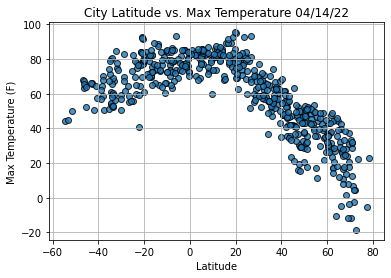

In [13]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

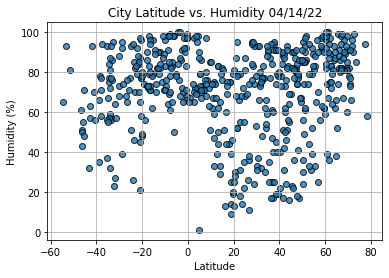

In [14]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

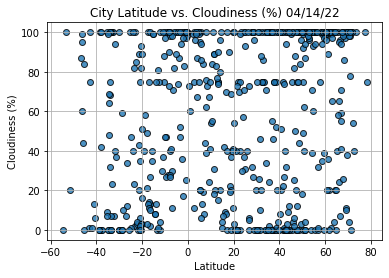

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

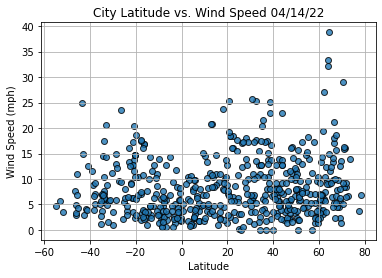

In [17]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [44]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    #(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    (slope, intercept, r_value, _, _) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()
    




In [45]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

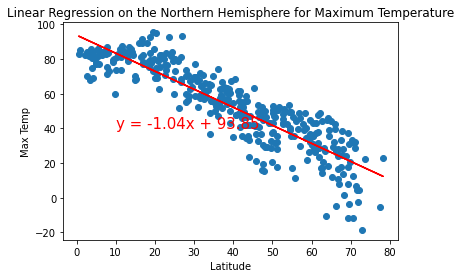

In [52]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
for Maximum Temperature', 'Max Temp',(10,40))

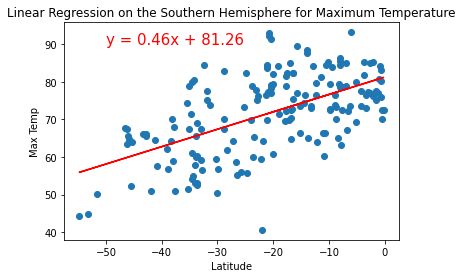

In [55]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
for Maximum Temperature', 'Max Temp',(-50,90))

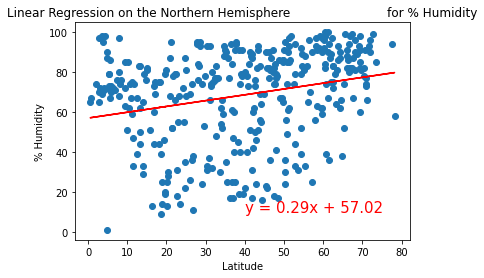

In [57]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

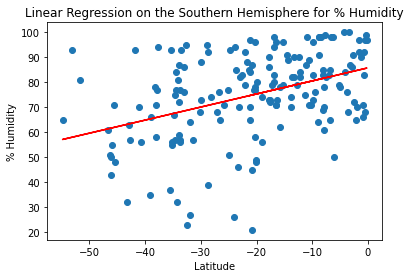

In [61]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
for % Humidity', '% Humidity',(-50,15))

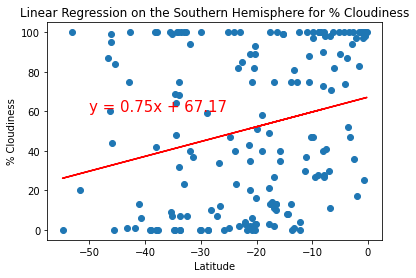

In [63]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
for % Cloudiness', '% Cloudiness',(-50,60))

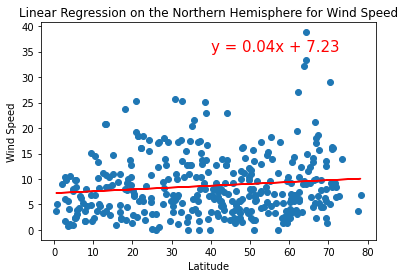

In [65]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
for Wind Speed', 'Wind Speed',(40,35))

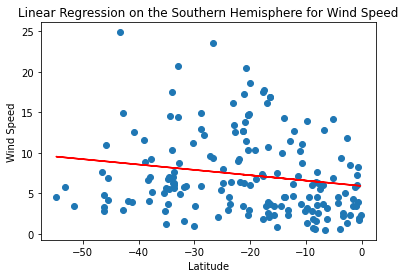

In [67]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
for Wind Speed', 'Wind Speed',(-50,35))